In [2]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [3]:
pwd()

'C:\\Users\\Arun'

# Data Injestion

In [5]:
# Load the dataset
Transaction_ID = pd.read_csv("Downloads//Transaction_ID.csv")
Customer_ID = pd.read_csv("Downloads//Customer_ID.csv")
City = pd.read_csv("Downloads//City.csv")
Cab_Data = pd.read_csv("Downloads//Cab_Data.csv")
print("Cab_Data Dataset:")
print(Cab_Data.head())
print("City Dataset:")
print(City.head())
print("Transaction_ID Dataset:")
print(Transaction_ID.head())
print("City Dataset:")
print(Customer_ID.head())
print("Customer_ID Dataset:")
print(Customer_ID.head())


Cab_Data Dataset:
   Transaction ID Date of Travel   Company        City  KM Travelled  \
0        10000011     08-01-2016  Pink Cab  ATLANTA GA         30.45   
1        10000012     06-01-2016  Pink Cab  ATLANTA GA         28.62   
2        10000013     02-01-2016  Pink Cab  ATLANTA GA          9.04   
3        10000014     07-01-2016  Pink Cab  ATLANTA GA         33.17   
4        10000015     03-01-2016  Pink Cab  ATLANTA GA          8.73   

   Price Charged  Cost of Trip  
0         370.95       313.635  
1         358.52       334.854  
2         125.20        97.632  
3         377.40       351.602  
4         114.62        97.776  
City Dataset:
             City   Population      Users
0     NEW YORK NY   8,405,837    302,149 
1      CHICAGO IL   1,955,130    164,468 
2  LOS ANGELES CA   1,595,037    144,132 
3        MIAMI FL   1,339,155     17,675 
4  SILICON VALLEY   1,177,609     27,247 
Transaction_ID Dataset:
   Transaction ID  Customer ID Payment_Mode
0        10000011

In [6]:
Cab_Data.describe()
Cab_Data.info()
Cab_Data.isnull().sum()
# minimum year is in the year 2016 and Date of Travel is in the year 2019
# Price charged has the highest variance amongst all the columns.Hence may be the people with different income groups travelling
# in Km travelled people boarding the cab have travelled a maximumof 48 miles indicating that the cabs are not used for outstation travell and more or less confined to Metropolition cities
# data doesnot have any null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  object 
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(1), object(3)
memory usage: 19.2+ MB


Transaction ID    0
Date of Travel    0
Company           0
City              0
KM Travelled      0
Price Charged     0
Cost of Trip      0
dtype: int64

In [7]:
# Check the first few rows
print(Cab_Data.head())

# Check the shape of the dataset
print(Cab_Data.shape)

# Check the data types of columns
print(Cab_Data.dtypes)

   Transaction ID Date of Travel   Company        City  KM Travelled  \
0        10000011     08-01-2016  Pink Cab  ATLANTA GA         30.45   
1        10000012     06-01-2016  Pink Cab  ATLANTA GA         28.62   
2        10000013     02-01-2016  Pink Cab  ATLANTA GA          9.04   
3        10000014     07-01-2016  Pink Cab  ATLANTA GA         33.17   
4        10000015     03-01-2016  Pink Cab  ATLANTA GA          8.73   

   Price Charged  Cost of Trip  
0         370.95       313.635  
1         358.52       334.854  
2         125.20        97.632  
3         377.40       351.602  
4         114.62        97.776  
(359392, 7)
Transaction ID      int64
Date of Travel     object
Company            object
City               object
KM Travelled      float64
Price Charged     float64
Cost of Trip      float64
dtype: object


# EDA related questions

Here are the questions formalized from the provided points:


3

2. Which cities have the highest average travels on what day4?

3. On which days is travel highest in each c5ty?

4. What is the average rate per travel per day for each co6pany?

5. What is the average price charged per company during off-season and on7season?

6. What is the sum and average cost of trips by companies 8er month?

7. Which cab company (Pink or Yellow) has9more trips?

8. How does company compare to 10rice charged?

9. How does company compare to the averag11cost of trips?

10. How does company compare to kil12eters travelled?

11. What is the average age of customers usi13 each cab company?

12. What is the gender b14akdown of customers?

13. How does gender compare to average kilometers15ravelled for each cab?

14. How does gender compare to income betw16n the two cab companies?

15. Which age group17rings in the most revenue?

16. How do city, age18and average expenses relate?

17. Wha19is the projected sales volume?

18. Are there any outlier months with 20gnificantly more or less travel?

b4a-4ee3-bd8b-a7a5bca50f75/Customer_ID.csv

In [9]:
# Creatng a column called Profit as this can be used to analyse which company is more profitable 

In [10]:
Cab_Data['Profit']=Cab_Data['Price Charged']-Cab_Data['Cost of Trip']

In [11]:
Cab_Data['Profit'].head()

0    57.315
1    23.666
2    27.568
3    25.798
4    16.844
Name: Profit, dtype: float64

In [12]:
# What is the average Profit for each company for yearly wise?
Cab_Data['Date of Travel'] = pd.to_datetime(Cab_Data['Date of Travel'], format='%d-%m-%Y')
Cab_Data['Year'] = Cab_Data['Date of Travel'].dt.year
Cab_Data['Year-month'] = pd.to_datetime(Cab_Data['Date of Travel'], format='%Y-%m')

In [13]:
Cab_Data.groupby(['Year', 'Company'])['Profit'].mean().reset_index()

,Year,Company,Profit
0,2016,Pink Cab,68.321819
1,2016,Yellow Cab,169.347821
2,2017,Pink Cab,67.070839
3,2017,Yellow Cab,168.817057
4,2018,Pink Cab,53.229689
5,2018,Yellow Cab,143.416122


In [14]:
# seasonality Profits for each organization
Cab_Data.groupby(['Year', 'Company'])['Profit'].mean().reset_index()

,Year,Company,Profit
0,2016,Pink Cab,68.321819
1,2016,Yellow Cab,169.347821
2,2017,Pink Cab,67.070839
3,2017,Yellow Cab,168.817057
4,2018,Pink Cab,53.229689
5,2018,Yellow Cab,143.416122


In [15]:
# 1. What is the average kilomtere profit for each company of travels per day for each year?
Cab_Data['Year-Month'] = Cab_Data['Date of Travel'].dt.strftime('%Y-%m')

In [16]:
Cab_Data['Year-Month'].head()

0    2016-01
1    2016-01
2    2016-01
3    2016-01
4    2016-01
Name: Year-Month, dtype: object

In [17]:
month_profit=Cab_Data.groupby(['Year-Month', 'Company'])['Profit'].mean().reset_index()
month_profit
month_profit.to_csv('month_profit.csv', index=False)

In [18]:
year_profit=Cab_Data.groupby(['Year', 'Company'])['Profit'].mean().reset_index()
year_profit
year_profit.to_csv('Year_profit.csv', index=False)

## Univariate Analyis of Cab Data set

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


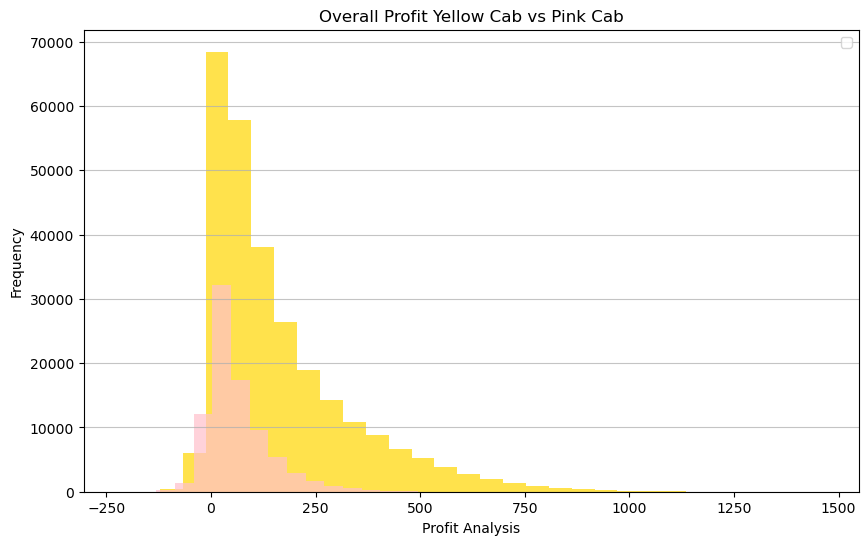

In [20]:
# Filter for Yellow Cab company
yellow_cab = Cab_Data[Cab_Data['Company'] == 'Yellow Cab']
pink_cab = Cab_Data[Cab_Data['Company'] == 'Pink Cab']

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(yellow_cab['Profit'], bins=30, color='gold', alpha=0.7)
plt.hist(pink_cab['Profit'], bins=30, color='#FFC0CB', alpha=0.7)
plt.title('Overall Profit Yellow Cab vs Pink Cab')
plt.xlabel('Profit Analysis')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
# Add legend
plt.legend()
plt.show()


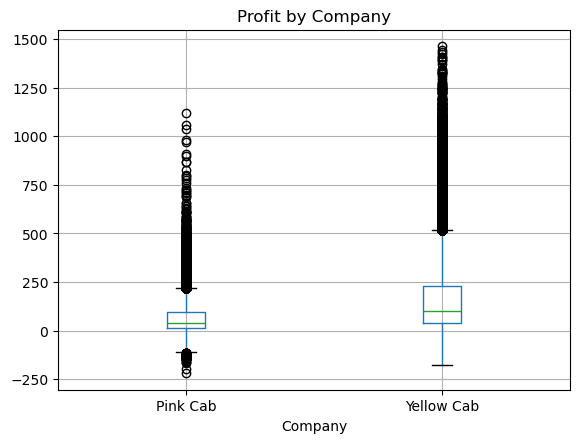

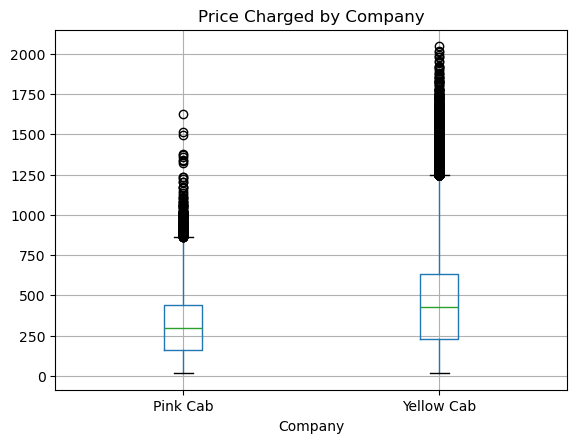

In [21]:
# Create a boxplot grouped by Company
boxplot = Cab_Data.boxplot(column='Profit', by='Company')
plt.title('Profit by Company')
plt.suptitle('')  # Suppress the default title to avoid redundancy
plt.show()

# Create a boxplot grouped by subject
boxplot = Cab_Data.boxplot(column='Price Charged', by='Company')
plt.title('Price Charged by Company')
plt.suptitle('')  # Suppress the default title to avoid redundancy
plt.show()



Yellow cabs has a very high Profit margin in comparison to Pink cab.
The outlierswhen it comes to yellow cab lie more towards the upper limit then lower limit indicating that far more affluent customers travel in yelllow cab then Pink cab.Hence we would need to investigate if we can target customers especially Age analysis and Socio economic status so that we can undestand the company profitability based on income, age and demography 

## Geography Analysis

In [24]:
# Profit city vise KM travelled analysis geography wise
Cab_Data['profit_per_km']=Cab_Data['Profit']/Cab_Data['KM Travelled']

In [25]:
city_km=Cab_Data.groupby(['Company','City'])['profit_per_km'].mean()
city_km.to_csv("city_km.csv")

In [26]:
# seasoality Analysis -On which months per kilometer is profit highest in each city ?
city_year_Profit=Cab_Data.groupby(['Year','Company','City'])['profit_per_km'].mean()
city_year_Profit.to_csv("city_year_Profit.csv")

In [27]:
Cab_Data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Profit,Year,Year-month,Year-Month,profit_per_km
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635,57.315,2016,2016-01-08,2016-01,1.882266
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854,23.666,2016,2016-01-06,2016-01,0.826904
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632,27.568,2016,2016-01-02,2016-01,3.049558
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602,25.798,2016,2016-01-07,2016-01,0.777751
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.776,16.844,2016,2016-01-03,2016-01,1.929439


In [28]:
city_km

Company     City          
Pink Cab    ATLANTA GA         2.418367
            AUSTIN TX          3.601619
            BOSTON MA          2.234623
            CHICAGO IL         1.508437
            DALLAS TX          0.825393
            DENVER CO          1.276010
            LOS ANGELES CA     2.501389
            MIAMI FL           3.601181
            NASHVILLE TN       1.521093
            NEW YORK NY        4.790525
            ORANGE COUNTY      3.008943
            PHOENIX AZ         1.894585
            PITTSBURGH PA      1.066107
            SACRAMENTO CA      1.815109
            SAN DIEGO CA       2.638450
            SEATTLE WA         1.825484
            SILICON VALLEY     3.898292
            TUCSON AZ          3.267249
            WASHINGTON DC      2.308069
Yellow Cab  ATLANTA GA         5.793907
            AUSTIN TX          5.573738
            BOSTON MA          2.724566
            CHICAGO IL         2.862147
            DALLAS TX          8.659813
            D

In [29]:
boston_cab=Cab_Data[Cab_Data['City']=='BOSTON MA']
boston_km=boston_cab.groupby(['Company','City'])['profit_per_km'].mean()
# city_km.to_csv("city_km.csv")

In [30]:
boston_km

Company     City     
Pink Cab    BOSTON MA    2.234623
Yellow Cab  BOSTON MA    2.724566
Name: profit_per_km, dtype: float64

In [31]:
Cab_Data.head()
Customer_ID.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [32]:
#understand Top 10 Customer
# merge cab_data with transaction_id table
cab_Transaction=pd.merge(Cab_Data,Transaction_ID, on = 'Transaction ID', how='inner')

In [33]:
Customer_ID.head(2)
cab_Transaction.head(2)
cab_Transaction.shape

(359392, 14)

In [34]:
# merge cab_Transaction with customer_id table for master table
cab_Transaction_customer=pd.merge(cab_Transaction,Customer_ID, on = 'Customer ID', how='inner')
df=pd.merge(cab_Transaction_customer,City, on = 'City', how='inner')
# merge cab_Transaction with customer_id table for master table
df=pd.merge(cab_Transaction,Customer_ID, on = 'Customer ID', how='inner')
df.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Profit,Year,Year-month,Year-Month,profit_per_km,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month)
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635,57.315,2016,2016-01-08,2016-01,1.882266,29290,Card,Male,28,10813
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854,23.666,2016,2016-01-06,2016-01,0.826904,27703,Card,Male,27,9237
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632,27.568,2016,2016-01-02,2016-01,3.049558,28712,Cash,Male,53,11242
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602,25.798,2016,2016-01-07,2016-01,0.777751,28020,Cash,Male,23,23327
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.776,16.844,2016,2016-01-03,2016-01,1.929439,27182,Card,Male,33,8536


In [35]:
#What is there gender
gender_count=df.groupby(['Company','City','Gender'])['Customer ID'].count()
# gender_count.to_csv('gender_count.csv')

In [36]:
#What is there average Age 
Age_count=df.groupby(['Company','City','Age'])['Customer ID'].count()
Age_Profit=df.groupby(['Company','City','Age'])['Profit'].mean()
Age_count.to_csv('Age_count.csv')
Age_Profit.to_csv('Age_Profit.csv')


In [37]:
cab_Transaction_customer.shape

(359392, 17)

In [38]:
# Income wise prediction

In [39]:
Avg_Income=df.groupby(['Company','City'])['Income (USD/Month)'].mean()
Avg_Income.to_csv('Avg_Income.csv')

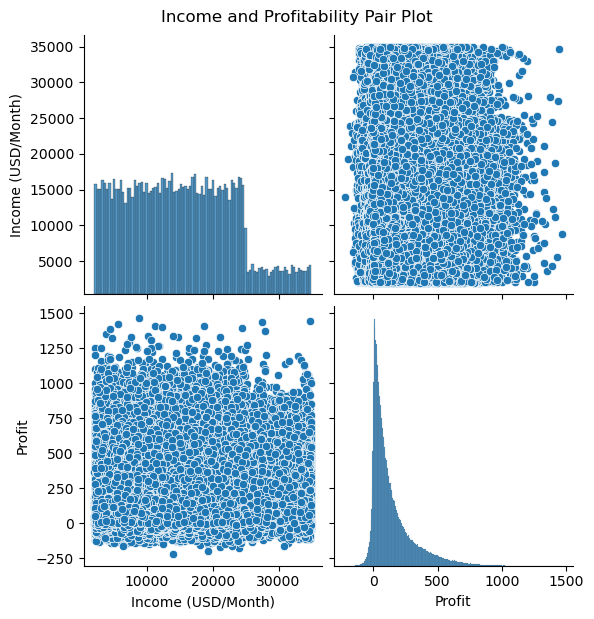

In [40]:
# Create a pair plot
sns.pairplot(df, vars=['Income (USD/Month)', 'Profit'], height=3)

# Show the plot
plt.suptitle('Income and Profitability Pair Plot', y=1.02)  # Adjust title position
plt.show()

In [41]:
# binning Income variable for Further analysis
df['Income (USD/Month)'].min()
df['Income (USD/Month)'].max()

35000

In [42]:
# Define bins and labels
bins = [0, 8500, 16000, 24000, 35000]
labels = ['Low', 'Medium', 'High', 'Very High']

In [43]:
# Create a new column with binned data
# ignore Warnings
df['Income_Binned'] = pd.cut(df['Income (USD/Month)'], bins=bins, labels=labels, right=False)
Income_Binned=df.groupby(['Company','Income_Binned'])['Profit'].sum()
Income_Binned.to_csv('Income_Binned.csv')

C:\Users\Arun\AppData\Local\Temp\ipykernel_5928\2854249975.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  Income_Binned=df.groupby(['Company','Income_Binned'])['Profit'].sum()


PermissionError: [Errno 13] Permission denied: 'Income_Binned.csv'

In [ ]:
df.to_csv('df.csv')

In [ ]:
# customer segmentation based on the number of rides
df.groupby(['Company','City','Gender'])['Customer ID'].count()

In [ ]:
df.head()

In [ ]:
# Select the columns to use for clustering
X = df[['Price Charged', 'Age','Profit']]

# Determine the optimal number of clusters using the Elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Choose the number of clusters based on the Elbow plot
n_clusters = 3

# Initialize and fit the K-Means model
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(X)

# Add the cluster labels to the DataFrame
df['cluster'] = y_kmeans

# Visualize the clusters
plt.scatter(X['Price Charged'], X['Age'],X['Profit'], c=y_kmeans, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')
plt.title(f'K-Means Clustering (k={n_clusters})')
plt.xlabel('Price Charged')
plt.ylabel('Age')
plt.legend()
plt.show()

In [ ]:
df['cluster'].value_counts()
df.to_csv('df.csv')
# df[df['cluster']==1]
df.to_csv('df.csv')

In [45]:
df.head(2)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Profit,Year,Year-month,Year-Month,profit_per_km,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Income_Binned
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635,57.315,2016,2016-01-08,2016-01,1.882266,29290,Card,Male,28,10813,Medium
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854,23.666,2016,2016-01-06,2016-01,0.826904,27703,Card,Male,27,9237,Medium


In [91]:
# top 10 customers per company and their geography analysis
geography=df.groupby(['Company','City'])['Profit'].sum()
# Profit_f=Profit.sort_values(by='Profit')
geography.to_csv("geography.csv")

In [ ]:
df.groupby(['Company','City'])['Profit'].sum()

In [107]:
df.groupby('c')

Profit,-220.0600,-198.6980,-176.9308,-168.9850,-164.0400,-160.7140,-160.5360,-153.2500,-150.3800,-148.5860,...,1371.6260,1387.9860,1390.4464,1399.1100,1408.0252,1408.3440,1424.1408,1433.3420,1445.2720,1463.9660
City,,,,,,,,,,,,,,,,,,,,,
ATLANTA GA,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AUSTIN TX,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
BOSTON MA,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
CHICAGO IL,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
DALLAS TX,1,1,0,1,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
DENVER CO,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
LOS ANGELES CA,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MIAMI FL,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
NASHVILLE TN,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
